In [226]:
print('Im working')

Im working


In [227]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
# Imports for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn import preprocessing

In [228]:
# Read the dataset
df3 = pd.read_csv("data/data3.csv")
df6 = pd.read_csv("data/data6.csv")

In [229]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  0.05
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run bootstrap
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

# sampling 6- and 3-dimensional datasets
sampled_dataset_6d = get_sample_from_dataset(df6)
sampled_dataset_3d = get_sample_from_dataset(df3)

# scale both datasets and samples
df6_scaled = preprocessing.scale(df6)
df3_scaled = preprocessing.scale(df3)
sampled_dataset_scaled_d6 = preprocessing.scale(sampled_dataset_6d)
sampled_dataset_scaled_d3 = preprocessing.scale(sampled_dataset_3d)

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 6)
The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)


In [230]:
# 6-dimensional dataset
# spliting dataset features to individual lists
x_vals_6d = (df6_scaled[:,0])
y_vals_6d = (df6_scaled[:,1])
z_vals_6d = (df6_scaled[:,2])
u_vals_6d = (df6_scaled[:,3])
v_vals_6d = (df6_scaled[:,4])
w_vals_6d = (df6_scaled[:,5])
# spliting sample features to individual lists
sample_x_vals_6d = (sampled_dataset_scaled_d6[:,0])
sample_y_vals_6d = (sampled_dataset_scaled_d6[:,1])
sample_z_vals_6d = (sampled_dataset_scaled_d6[:,2])
sample_u_vals_6d = (sampled_dataset_scaled_d6[:,3])
sample_v_vals_6d = (sampled_dataset_scaled_d6[:,4])
sample_w_vals_6d = (sampled_dataset_scaled_d6[:,5])

# 3-dimensional dataset
# spliting dataset features to individual lists
x_vals_3d = (df3_scaled[:,0])
y_vals_3d = (df3_scaled[:,1])
z_vals_3d = (df3_scaled[:,2])
# spliting sample features to individual lists
sample_x_vals_3d = (sampled_dataset_scaled_d3[:,0])
sample_y_vals_3d = (sampled_dataset_scaled_d3[:,1])
sample_z_vals_3d = (sampled_dataset_scaled_d3[:,2])

In [231]:
import matplotlib.pyplot as plt
# method to calculate descriptive statistical information about given data & sample
def descr_analysis(data,sample,axis):
    data_mean = np.mean(data)
    data_median = np.median(data)
    #data_mode = stats.mode(data) takes too long
    data_range = np.ptp(data)
    data_iqr = stats.iqr(data)
    data_variance = np.var(data)
    data_std = np.std(data)
    
    sample_mean = np.mean(sample)
    sample_median = np.median(sample)
    sample_range = np.ptp(sample)
    sample_iqr = stats.iqr(sample)
    sample_variance = np.var(sample)
    sample_std = np.std(sample)
    #sample_mode = stats.mode(sample) takes too long
    
    print('DESCRIPTIVE STATISTICS FOR ' + axis + ' AXIS')
    print("Mean of dataset is {} || Mean of sample is {}".format(data_mean, sample_mean))
    print("Median of dataset is {} || Median of sample is {}".format(data_median, sample_median))
    print("Range of dataset is {} || Range of sample is {}".format(data_range, sample_range))
    print("Interquartile range of dataset is {} || Interquartile of sample is {}".format(data_iqr, sample_iqr))
    print("Variance of dataset is {} || Variance of sample is {}".format(data_variance, sample_variance))
    print("Standard deviation of dataset is {} || Standard deviation of sample is {}".format(data_std, sample_std))
    #print("The modal value is {} with a count of {}".format(data_mode.mode[0], data_mode.count[0]))
    
    plt.figure()
    sns.distplot(data, hist=False, kde=True, 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4},
             label = ''
            )
    sns.distplot(sample, hist=False, kde=True, 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 2},
             label = ''
            )
    plt.legend(('data','sample'),prop={'size': 10}, title = 'Feature ' + axis)

DESCRIPTIVE STATISTICS FOR x AXIS
Mean of dataset is -2.1268912557085667e-17 || Mean of sample is 5.921189464667502e-18
Median is 0.005966280607063569 || Median of sample is 0.00883826289912134
Range is 23.012924829499532 || Range of sample is 9.795812817624473
Interquartile range is 0.9516687929651968 || Interquartile of sample is 0.9617111506089537
Variance is 0.9999999999999998 || Variance of sample is 1.0
Standard deviation is 0.9999999999999999 || Standard deviation of sample is 1.0
DESCRIPTIVE STATISTICS FOR y AXIS
Mean of dataset is 1.3760844315887273e-17 || Mean of sample is -1.8947806286936006e-18
Median is -0.001222112785364638 || Median of sample is -0.00027752852608573203
Range is 14.691943022118302 || Range of sample is 11.350352674718431
Interquartile range is 0.9315864155578678 || Interquartile of sample is 0.9441767924158246
Variance is 0.9999999999999998 || Variance of sample is 0.9999999999999999
Standard deviation is 0.9999999999999999 || Standard deviation of sample

C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DESCRIPTIVE STATISTICS FOR z AXIS
Mean of dataset is 3.410605131648481e-18 || Mean of sample is 9.710750722054702e-18
Median is -0.00762570112896196 || Median of sample is -0.003817242494685933
Range is 23.036000991722958 || Range of sample is 14.829294689352942
Interquartile range is 0.7875747921223548 || Interquartile of sample is 0.8086946564363834
Variance is 0.9999999999999997 || Variance of sample is 1.0
Standard deviation is 0.9999999999999998 || Standard deviation of sample is 1.0
DESCRIPTIVE STATISTICS FOR u AXIS
Mean of dataset is -1.7953046456871865e-17 || Mean of sample is 5.684341886080802e-18
Median is 0.003614568286637705 || Median of sample is 0.0045604244457345955
Range is 8.555496702690782 || Range of sample is 7.888228694374447
Interquartile range is 1.2309518332177074 || Interquartile of sample is 1.216865879124469
Variance is 0.9999999999999994 || Variance of sample is 1.0000000000000002
Standard deviation is 0.9999999999999997 || Standard deviation of sample is 1.

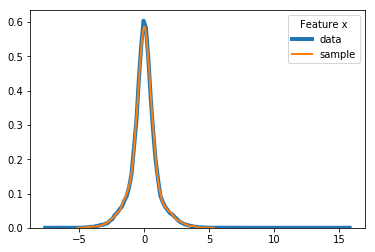

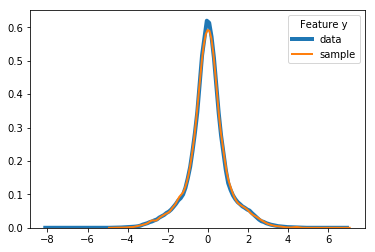

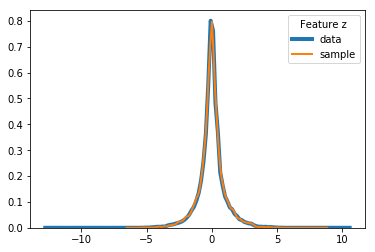

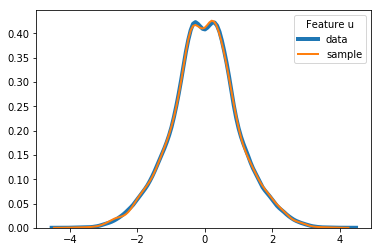

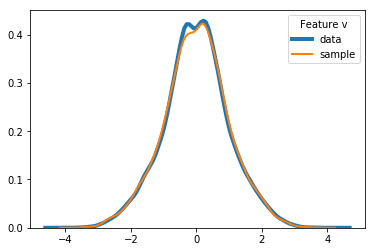

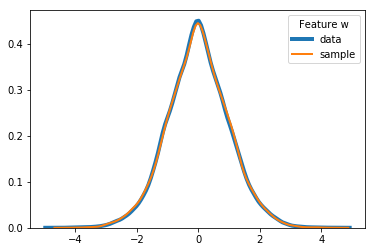

In [232]:
descr_analysis(x_vals_6d, sample_x_vals_6d, 'x')
descr_analysis(y_vals_6d, sample_y_vals_6d,  'y')
descr_analysis(z_vals_6d, sample_z_vals_6d,  'z')
descr_analysis(u_vals_6d, sample_u_vals_6d,  'u')
descr_analysis(v_vals_6d, sample_v_vals_6d,  'v')
descr_analysis(w_vals_6d, sample_w_vals_6d,  'w')

DESCRIPTIVE STATISTICS FOR x AXIS
Mean of dataset is 3.655979223064302e-16 || Mean of sample is -4.343784591280079e-16
Median is -0.06121192389479124 || Median of sample is -0.05362029988432944
Range is 9.707712960900597 || Range of sample is 5.630595511542703
Interquartile range is 1.4683779732092233 || Interquartile of sample is 1.448433638597718
Variance is 1.0000000000000002 || Variance of sample is 0.9999999999999999
Standard deviation is 1.0 || Standard deviation of sample is 0.9999999999999999
DESCRIPTIVE STATISTICS FOR y AXIS
Mean of dataset is -5.1632772131900615e-17 || Mean of sample is 4.736951571734001e-18
Median is -0.27562430827313616 || Median of sample is -0.2682101000944428
Range is 5.720090871154314 || Range of sample is 5.536147167078291
Interquartile range is 1.2009670944474893 || Interquartile of sample is 1.1880454070544233
Variance is 1.0000000000000002 || Variance of sample is 1.0
Standard deviation is 1.0 || Standard deviation of sample is 1.0


C:\Users\Panagiotis\Miniconda2\envs\Python_3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


DESCRIPTIVE STATISTICS FOR z AXIS
Mean of dataset is -1.9895196601282805e-17 || Mean of sample is -5.684341886080802e-18
Median is -0.2220016046594686 || Median of sample is -0.22767348203805193
Range is 6.213189516958977 || Range of sample is 6.132204315226453
Interquartile range is 1.2142985753445572 || Interquartile of sample is 1.2295668776098676
Variance is 1.0 || Variance of sample is 1.0
Standard deviation is 1.0 || Standard deviation of sample is 1.0


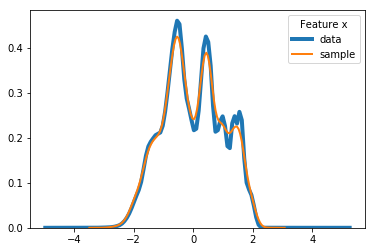

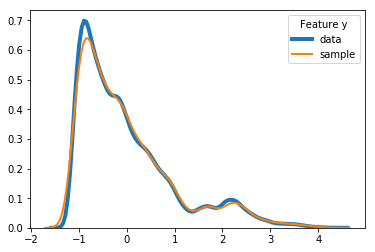

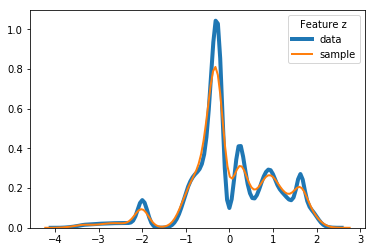

In [233]:
descr_analysis(x_vals_3d, sample_x_vals_3d, 'x')
descr_analysis(y_vals_3d, sample_y_vals_3d,  'y')
descr_analysis(z_vals_3d, sample_z_vals_3d,  'z')

scaled dataset variance of f3 and f6
scaled sample variance of f3 and f6
comparison of variance (abs)

(scale)
    PCA 3->2 AND 6->2
    scaterplots
Sampling
    num of samples
    clustering
    hopkin's